# Predict Used Market Value of Used Cars

In [1]:
import warnings
warnings.filterwarnings('ignore')

Load Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

Set working directory to dataset folder [Suitable for working with multiple files]

In [3]:
import os
os.chdir("D:/Datasets/car-dekho")
np.set_printoptions(precision=4)

# Step - 1

## Data Acquisition

Download Dataset From <a href="https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/download">Here</a>

In [4]:
train = pd.read_csv('car data.csv')

Know The Data

In [5]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Step - 2

## Preprocessing

Drop The Column Car_Name 

In [6]:
train = train.iloc[:, 1:]
train.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Changing Year (year when purchased) to Number of years Driven

In [7]:
train['Year'] = 2020 - train.Year

Change Categorical Data to Numerical Data

In [8]:
encoders = {}
for col, _type in zip(train.columns, train.dtypes):
    if _type == 'object':
        encoders[col] = LabelEncoder()
        train[col] = encoders[col].fit_transform(train[col])
train.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,2,0,1,0
1,7,4.75,9.54,43000,1,0,1,0
2,3,7.25,9.85,6900,2,0,1,0
3,9,2.85,4.15,5200,2,0,1,0
4,6,4.60,6.87,42450,1,0,1,0


# Step - 3

## Feature Selection

Check Correlation

In [9]:
train.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


<AxesSubplot:>

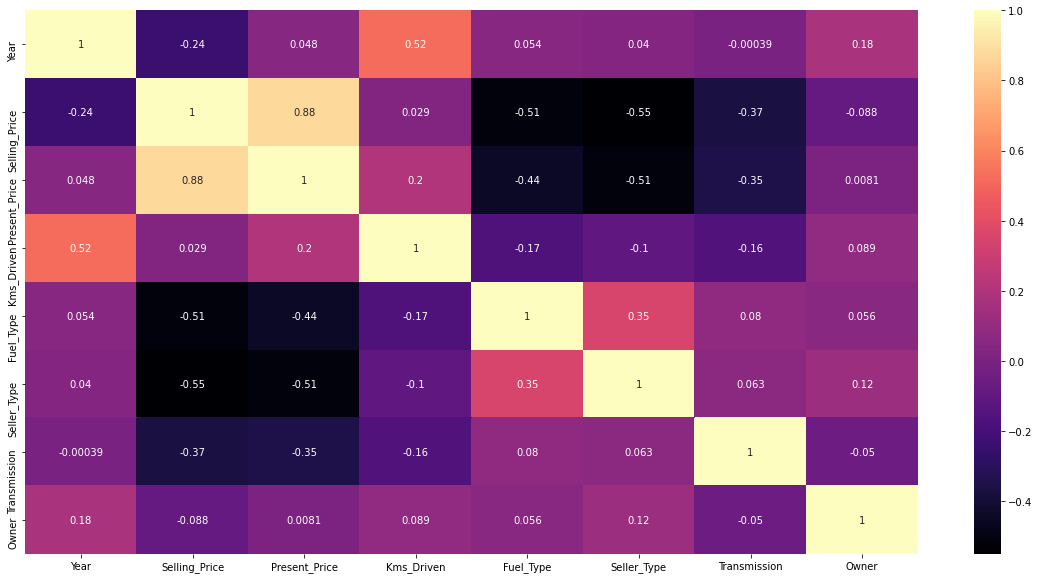

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, cmap='magma')

Splitting Dependent and Independent Varialbles

In [11]:
X = train.drop('Selling_Price', axis=1).values
y = train['Selling_Price'].values

Dummy Model to check Important Features

In [12]:
model = ExtraTreesRegressor().fit(X, y)
model.feature_importances_

array([8.0638e-02, 4.3767e-01, 3.9733e-02, 1.3240e-01, 2.3703e-01,
       7.2260e-02, 2.7184e-04])

Visualization

<BarContainer object of 7 artists>

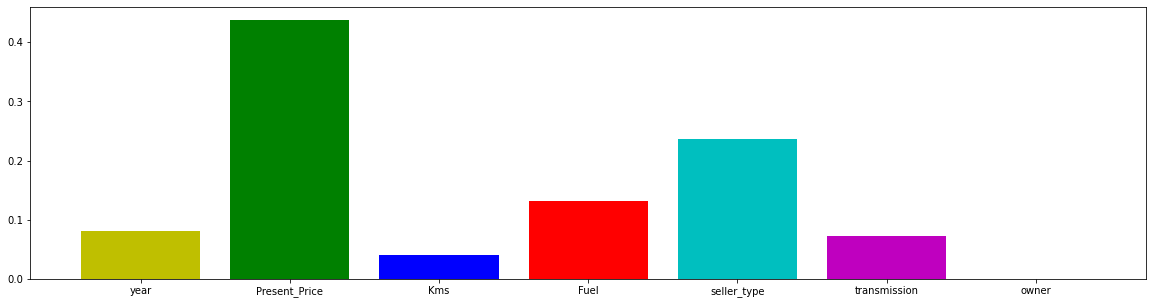

In [13]:
plt.figure(figsize=(20, 5))
plt.bar(
    x=['year', 'Present_Price', 'Kms', 'Fuel', 'seller_type', 'transmission', 'owner'], 
    height=model.feature_importances_, 
    color = 'ygbrcmb'
)

Owner is the least important feature so it can be removed from Independent Variables

# Step - 4

## Model Building

Split Train Test Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Create Simple Model and check Accuracy

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8123221344361771

anything above 85% is good<br>
Now check prediction Distribution 

<AxesSubplot:>

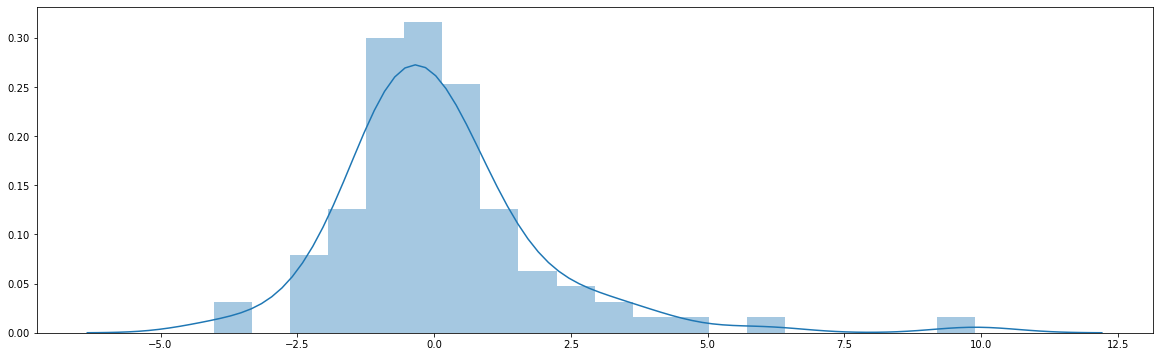

In [16]:
plt.figure(figsize=(20, 6))
sns.distplot(y_test-model.predict(X_test))

Try More Complex Algrithms

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666791490599452

<AxesSubplot:>

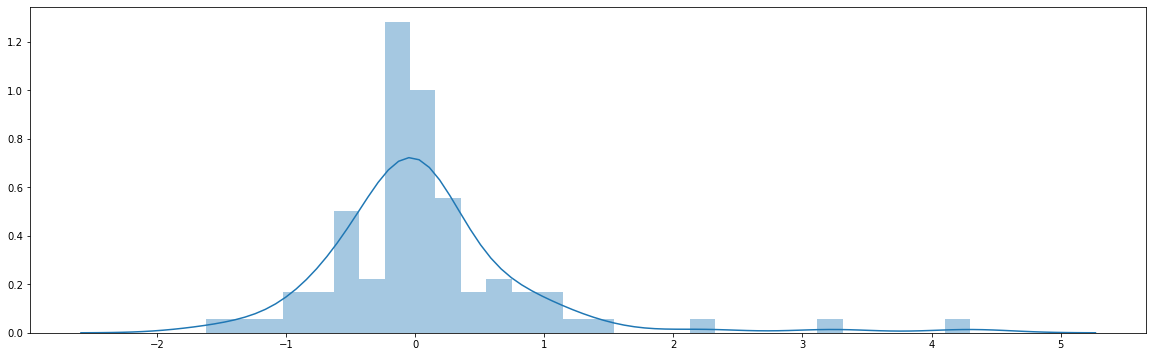

In [18]:
plt.figure(figsize=(20, 6))
sns.distplot(y_test-model.predict(X_test))

# Step - 5

## Performance Boosting / Parameter Tuning

Create Parameter Combinations

In [19]:
n_estimators = np.arange(100, 1201, 100, np.int)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

max_depth = np.arange(5, 31, 5, np.int)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [20]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
        }

In [21]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = param_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1
)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-27.828, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-3.671, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-2.375, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-4.891, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-3.170, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-23.818, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, s

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-3.708, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-23.582, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-3.984, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-1.757, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-4

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

Check Best Parameters for Model

In [23]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

## Visualize Model Performance

In [24]:
predictions=rf_random.predict(X_test)

<AxesSubplot:>

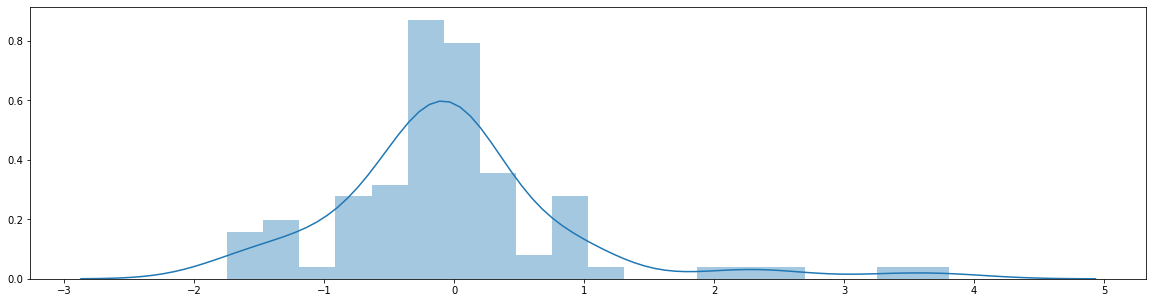

In [25]:
plt.figure(figsize=(20, 5))
sns.distplot(y_test-predictions)

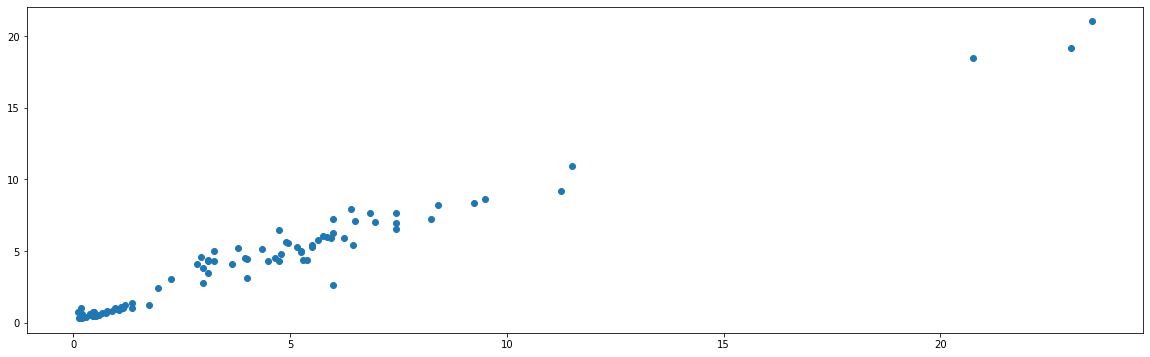

In [26]:
plt.figure(figsize=(20, 6))
plt.scatter(y_test,predictions)

Make a function To Query

In [27]:
def predict(years_driven, present_price, kms_driven, fuel_type, seller_type, transmission, owner):
    
    """Returns Car Price in Lakh Rupees"""
    
    fuel_type = encoders['Fuel_Type'].transform([fuel_type])[0]
    seller_type = encoders['Seller_Type'].transform([seller_type])[0]
    transmission = encoders['Transmission'].transform([transmission])[0]
    return round(rf_random.predict([[years_driven, present_price, kms_driven, fuel_type, seller_type, transmission, owner]])[0], 2)
    

In [28]:
predict(years_driven=7, present_price=10, kms_driven=54242, fuel_type='Petrol', seller_type='Dealer', transmission='Manual', owner=0)

5.1

# The End